# EDA

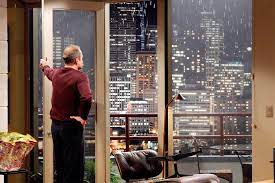

## <span style="color:black">_Stakeholder Buyer_</span>
### <span style="color:grey">**Larry Sanders**
* <span style="color:black"> Waterfront
* <span style="color:black"> Limited budget
* <span style="color:black"> Nice & isolated but central
* <span style="color:black"> Neighborhood without kids

### <span style="color:black"> Import Python Packages

In [ ]:
import warnings

warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_bokeh
import pgeocode
import geopandas as gpd
from shapely.geometry import Point
from geopandas import GeoDataFrame
pandas_bokeh.output_notebook()
import plotly.graph_objects as go
import plotly.express as px



### <span style="color:black"> Loading Dataframe and Explore it bit 

In [ ]:
df_homesale = pd.read_csv("data/King_County_House_prices_dataset.csv")
df_homesale.info()
df_homesale["waterfront"] = df_homesale["waterfront"].fillna(0.)
df_homesale["condition"].unique()

In [ ]:
nomi = pgeocode.Nominatim('us')
df_home_count = df_homesale.groupby("zipcode").count()["id"].reset_index()
df_home_mprice = df_homesale.groupby("zipcode").median()["price"].reset_index()
df_home_zip = pd.merge(df_home_count, df_home_mprice)

## Map for the amount of available real estate at each place(zipcode) and their median price 

In [ ]:
df_home_zip["zipcode"] = df_home_zip["zipcode"].astype("string")
df_home_zip["lat"] = (nomi.query_postal_code((df_home_zip["zipcode"]).tolist()).latitude)
df_home_zip["lon"] = (nomi.query_postal_code((df_home_zip["zipcode"]).tolist()).longitude)
fig = px.scatter_mapbox(df_home_zip, lat="lat", lon="lon", color="price", size="id", size_max=18, color_continuous_scale=px.colors.diverging.Portland, height=500, width=500)
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0, "t":0, "l":0, "b":0})

## Map for the amount of available water view real estate at each place(zipcode) and their median price

In [ ]:
# real estate with water view, least 2 bedrooms and 1 bathroom
df_hw_count = (df_homesale.query("waterfront==1")).groupby("zipcode").count()["id"].reset_index()
df_hw_mprice = (df_homesale.query("waterfront==1")).groupby("zipcode").median()["price"].reset_index()
df_hw_mcondition = (df_homesale.query("waterfront==1")).groupby("zipcode").mean()["condition"].reset_index()
df_hw_zip_tmp = pd.merge(df_hw_count, df_hw_mprice)
df_hw_zip = pd.merge(df_hw_zip_tmp, df_hw_mcondition)
df_hw_zip_final = df_hw_zip.query("zipcode==98070 or zipcode==98166 or zipcode==98040 or zipcode==98198 or zipcode==98008").reset_index()
df_hw_zip_final

In [ ]:
df_hw_Valshon = df_homesale.query("waterfront==1 and zipcode==98070")
df_hw_Valshon.date = pd.to_datetime(df_hw_Valshon.date)
df_hw_Valshon['month_year'] = df_hw_Valshon['date'].dt.strftime('%Y-%m')
df_hw_Valshon = df_hw_Valshon.sort_values("month_year")
df_hw_Valshon

In [ ]:
df_hw_Burien = df_homesale.query("waterfront==1 and zipcode==98166")
df_hw_Burien.date = pd.to_datetime(df_hw_Burien.date)
df_hw_Burien['month_year'] = df_hw_Burien['date'].dt.strftime('%Y-%m')
df_hw_Burien = df_hw_Burien.sort_values("month_year")
df_hw_Burien

In [ ]:
df_hw_MercerIsland = df_homesale.query("waterfront==1 and zipcode==98040")
df_hw_MercerIsland.date = pd.to_datetime(df_hw_MercerIsland.date)
df_hw_MercerIsland['month_year'] = df_hw_MercerIsland['date'].dt.strftime('%Y-%m')
df_hw_MercerIsland = df_hw_MercerIsland.sort_values("month_year")
df_hw_MercerIsland

In [ ]:
df_hw_LakeSammamish = df_homesale.query("waterfront==1 and zipcode==98008")
df_hw_LakeSammamish.date = pd.to_datetime(df_hw_LakeSammamish.date)
df_hw_LakeSammamish['month_year'] = df_hw_LakeSammamish['date'].dt.strftime('%Y-%m')
df_hw_LakeSammamish = df_hw_LakeSammamish.sort_values("month_year")
df_hw_LakeSammamish

In [ ]:
df_hw_DesMoines = df_homesale.query("waterfront==1 and zipcode==98198")
df_hw_DesMoines.date = pd.to_datetime(df_hw_DesMoines.date)
df_hw_DesMoines['month_year'] = df_hw_DesMoines['date'].dt.strftime('%Y-%m')
df_hw_DesMoines = df_hw_DesMoines.sort_values("month_year")
df_hw_DesMoines

In [ ]:
fig, ax = plt.subplots(figsize=(12,8))

scatter_matplot = ax.scatter(df_hw_Valshon.month_year, 
            df_hw_Valshon.price, 
            s= (df_hw_Valshon.sqft_lot)/100, 
            alpha=0.5,
            c=df_hw_Valshon.bedrooms, #df_weather.weather_class.to_list(),
            cmap='brg', # we had to set the cmap by hand because the color list is not ordered
            label=df_hw_Valshon.bedrooms.to_list())
plt.xticks(rotation=45, horizontalalignment='right', fontsize=13)
plt.yticks(fontsize=13)
#plt.xlabel('Date', fontsize=15)
plt.ylabel('Price', fontsize=15)
plt.title('Homes in Valshon', fontsize=20)
# Here you can set that only 40 x-ticks are shown, otherwise it will be too many
#ax.xaxis.set_major_locator(MaxNLocator(40))


ax.legend(*scatter_matplot.legend_elements(), loc='upper center', fontsize=13, title= 'Number of bedroom')
plt.show()
fig.savefig('fig_Valsons.png')

In [ ]:
fig, ax = plt.subplots(figsize=(12,8))

scatter_matplot = ax.scatter(df_hw_Burien.month_year, 
            df_hw_Burien.price, 
            s= (df_hw_Burien.sqft_lot)/100, 
            alpha=0.5,
            c=df_hw_Burien.bedrooms, #df_weather.weather_class.to_list(),
            cmap='brg', # we had to set the cmap by hand because the color list is not ordered
            label=df_hw_Burien.bedrooms.to_list())
plt.xticks(rotation=45, horizontalalignment='right', fontsize=13)
plt.yticks(fontsize=13)
#plt.xlabel('Date', fontsize=15)
plt.ylabel('Price', fontsize=15)
plt.title('Homes in Burien', fontsize=20)
# Here you can set that only 40 x-ticks are shown, otherwise it will be too many
#ax.xaxis.set_major_locator(MaxNLocator(40))


ax.legend(*scatter_matplot.legend_elements(), loc='upper center', fontsize=13, title= 'Number of bedroom')
plt.show()
fig.savefig('fig_Burien.png')

In [ ]:
fig, ax = plt.subplots(figsize=(12,8))

scatter_matplot = ax.scatter(df_hw_MercerIsland.month_year, 
            df_hw_MercerIsland.price, 
            s= (df_hw_MercerIsland.sqft_lot)/100, 
            alpha=0.5,
            c=df_hw_MercerIsland.bedrooms, #df_weather.weather_class.to_list(),
            cmap='brg', # we had to set the cmap by hand because the color list is not ordered
            label=df_hw_MercerIsland.bedrooms.to_list())
plt.xticks(rotation=45, horizontalalignment='right', fontsize=13)
plt.yticks(fontsize=13)
#plt.xlabel('Date', fontsize=15)
plt.ylabel('Price', fontsize=15)
plt.title('Homes in Mercer Island', fontsize=20)
# Here you can set that only 40 x-ticks are shown, otherwise it will be too many
#ax.xaxis.set_major_locator(MaxNLocator(40))


ax.legend(*scatter_matplot.legend_elements(), loc='upper center', fontsize=13, title= 'Number of bedroom')
plt.show()
fig.savefig('fig_Mercer_Island.png')

In [ ]:
fig, ax = plt.subplots(figsize=(12,8))

scatter_matplot = ax.scatter(df_hw_LakeSammamish.month_year, 
            df_hw_LakeSammamish.price, 
            s= (df_hw_LakeSammamish.sqft_lot)/100, 
            alpha=0.5,
            c=df_hw_LakeSammamish.bedrooms, #df_weather.weather_class.to_list(),
            cmap='brg', # we had to set the cmap by hand because the color list is not ordered
            label=df_hw_LakeSammamish.bedrooms.to_list())
plt.xticks(rotation=45, horizontalalignment='right', fontsize=13)
plt.yticks(fontsize=13)
#plt.xlabel('Date', fontsize=15)
plt.ylabel('Price', fontsize=15)
plt.title('Homes in Lake Sammamish ', fontsize=20)
# Here you can set that only 40 x-ticks are shown, otherwise it will be too many
#ax.xaxis.set_major_locator(MaxNLocator(40))


ax.legend(*scatter_matplot.legend_elements(), loc='lower left', fontsize=13, title= 'Number of bedroom')
plt.show()
fig.savefig('fig_Lake_Sammamish.png')

In [ ]:
fig, ax = plt.subplots(figsize=(12,8))

scatter_matplot = ax.scatter(df_hw_DesMoines.month_year, 
            df_hw_DesMoines.price, 
            s= (df_hw_DesMoines.sqft_lot)/100, 
            alpha=0.5,
            c=df_hw_DesMoines.bedrooms, #df_weather.weather_class.to_list(),
            cmap='brg', # we had to set the cmap by hand because the color list is not ordered
            label=df_hw_DesMoines.bedrooms.to_list())
plt.xticks(rotation=45, horizontalalignment='right', fontsize=13)
plt.yticks(fontsize=13)
#plt.xlabel('Date', fontsize=15)
plt.ylabel('Price', fontsize=15)
plt.title('Homes in Des Moines', fontsize=20)
# Here you can set that only 40 x-ticks are shown, otherwise it will be too many
#ax.xaxis.set_major_locator(MaxNLocator(40))


ax.legend(*scatter_matplot.legend_elements(), loc='upper left', fontsize=13, title= 'Number of bedroom')
plt.show()
fig.savefig('fig_Des_Moines.png')

In [ ]:
df_hw_zip_final["zipcode"] = df_hw_zip_final["zipcode"].astype("string")
#df_hw_zip_final.info()
df_hw_zip_final["lat"] = (nomi.query_postal_code((df_hw_zip_final["zipcode"]).tolist()).latitude)
df_hw_zip_final["lon"] = (nomi.query_postal_code((df_hw_zip_final["zipcode"]).tolist()).longitude)
df_hw_zip_final


In [ ]:
fig = px.scatter_mapbox(df_hw_zip_final, lat="lat", lon="lon", color="id", size="condition", size_max=20, color_continuous_scale=px.colors.sequential.Bluered, height=1000, width=1000)
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0, "t":0, "l":0, "b":0})

## The ration of water view real estate

In [ ]:
df_h = df_homesale.groupby(["zipcode","waterfront"]).size().to_frame('Count').reset_index()
df_hl = df_h.query("waterfront == 0.")
df_hw = df_h.query("waterfront == 1.")
df_hw
df_ht = pd.merge(df_hl, df_hw, how="left", on="zipcode")
df_ht["Count_y"] = df_ht["Count_y"].fillna(0.)
df_ht["waterfront_y"] = df_ht["waterfront_y"].fillna(99.)
df_ht["Ratio of Waterfront"] = (df_ht["Count_y"]/(df_ht["Count_x"]+df_ht["Count_y"]))*100
df_ht["Count"] = df_ht["Count_y"]+df_ht["Count_x"]
print(df_ht["Ratio of Waterfront"].median())
df_ht["grade"] = (df_homesale.groupby("zipcode").mean()["grade"].reset_index())["grade"]
df_ht["Price (M)"] = (df_homesale.groupby("zipcode").mean()["price"].reset_index())["price"]
df_ht["condition"] = (df_homesale.groupby("zipcode").mean()["condition"].reset_index())["condition"]
df_ht2 = pd.merge(df_ht, df_hw_mcondition, how="left", on="zipcode")
df_ht3 = pd.merge(df_ht2, df_hw_mprice, how="left", on="zipcode")
df_ht3["condition_y"] = df_ht3["condition_y"].fillna(0.) 
df_ht3["price"] = df_ht3["price"].fillna(0.)
df_ht3

In [ ]:
df_ht["zipcode"] = df_ht["zipcode"].astype("string")
df_ht["lat"] = (nomi.query_postal_code((df_ht["zipcode"]).tolist()).latitude)
df_ht["lon"] = (nomi.query_postal_code((df_ht["zipcode"]).tolist()).longitude)
df_ht


In [ ]:
fig = px.scatter_mapbox(df_ht, lat="lat", lon="lon", color="Ratio of Waterfront", size="Count", 
                         size_max=40, color_continuous_scale=px.colors.diverging.Portland, height=1200, width=1400)
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0, "t":0, "l":0, "b":0})


In [ ]:
df_ht3["zipcode"] = df_ht3["zipcode"].astype("string")
df_ht3["lat"] = (nomi.query_postal_code((df_ht3["zipcode"]).tolist()).latitude)
df_ht3["lon"] = (nomi.query_postal_code((df_ht3["zipcode"]).tolist()).longitude)
fig = px.scatter_mapbox(df_ht3, lat="lat", lon="lon", color="condition_x", size="Count_y", 
                         size_max=50, color_continuous_scale=px.colors.sequential.Bluered, height=1000, width=1000)
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0, "t":0, "l":0, "b":0})

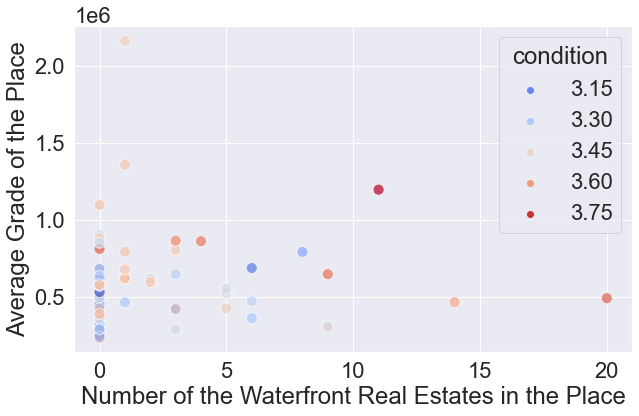

In [33]:
sns.set_style("darkgrid")
sns.set(font_scale = 2)
f, my_sea_plt = plt.subplots(figsize = (10, 6))
my_sea_plt = sns.scatterplot(x=df_ht["Count_y"], y=df_ht["Price (M)"], hue=df_ht["condition"],
                             s=120, alpha=0.7, 
                             palette='coolwarm')# alpha=0.5)#.set(title='Temperature Relation')
my_sea_plt.set_xticks([0, 5, 10, 15, 20])
my_sea_plt.set_xlabel("Number of the Waterfront Real Estates in the Place")
my_sea_plt.set_ylabel("Average Grade of the Place")
fig = my_sea_plt.get_figure()
fig.savefig('fig_place_nhw.png')

In [ ]:
sns.set_style("darkgrid")
sns.set(font_scale = 2)
f, my_sea_plt = plt.subplots(figsize = (10, 6))
my_sea_plt = sns.scatterplot(x=df_ht["Count_y"], y=df_ht["grade"], hue=df_ht["Price (M)"], size=(df_ht["Price (M)"]), 
                             sizes=(40, 400), alpha=0.7)#, 
                             #palette='deep', alpha=0.5)#.set(title='Temperature Relation')
my_sea_plt.set_xticks([0, 5, 10, 15, 20])
my_sea_plt.set_xlabel("Number of the Waterfront Real Estates in the Place")
my_sea_plt.set_ylabel("Average Grade of the Housing Unit")
fig = my_sea_plt.get_figure()
fig.savefig('fig_house_nhw.png')

## Median price for waterfront properties and other properties
### At places which have both properties

In [ ]:
df_mprice = df_homesale.groupby(["zipcode","waterfront"]).median().reset_index()
df_mpricel = df_mprice.query("waterfront == 0.")
df_mpricew = df_mprice.query("waterfront == 1.")
df_mpricet = pd.merge(df_mpricel, df_mpricew, how="left", on="zipcode")[["zipcode", "waterfront_x", "price_x", "waterfront_y", "price_y"]]
df_mpricet["price_y"] = df_mpricet["price_y"].fillna(0.)
df_mpricet.query("price_y != 0.")

In [ ]:
sns.set_style("darkgrid")
sns.set(font_scale = 2)
f, my_sea_plt = plt.subplots(figsize = (12, 8))
my_sea_plt = sns.barplot(x = ["Not Waterfront", "Waterfront"], y = [df_mpricet["price_x"].mean(), df_mpricet["price_y"].mean()], color = "#69b3a2",ci = None)
#my_sea_plt.set_xticklabels(my_sea_plt.get_xticklabels(), rotation = 90)
my_sea_plt.set(xlabel=None)
my_sea_plt.set_ylabel("Price")
my_sea_plt.set_yticks([200000, 500000, 800000])
#my_sea_plt.set_title("Top 10 Country of the Participants")
fig = my_sea_plt.get_figure()
fig.savefig('fig_price.png')